# Andes ieee14 vsg -- Trip Gen

**Scope**: import ieee14_vsg and flat run

Tips regarding andes:

1. static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

2. Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen


In [322]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post6.dev0+g976c129e
Pandapower version: 2.8.0


## Case info

1. Case1: 'ieee14_vsg_ZIP'  ---  a new REGCV1 (vsg-controlled inverter) connect to  BUS14

Disturbance: ZIP Load (P=0.05) is connected to Bus14 at 1s

2. Case2: 'ieee14_vsg_twoInv'  ---  two REGCV1 (vsg-controlled inverter) connect to  BUS14 and BUS12

Disturbance: ZIP Load (P=0.05) is connected to Bus14 at 1s

In [323]:
# Choose case
dir_path = os.path.abspath('..')
case_path1 = '/Test_ieee14_vsg/ieee14_vsg_ZIP.xlsx'
case_path2 = '/Test_ieee14_vsg/ieee14_vsg_twoInv.xlsx'

case1 = dir_path + case_path1
case2 = dir_path + case_path2

ssa = andes.load(case2,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [324]:
# Turn on numba to accelerate TDS
ssa.config.numba
ssa.PFlow.run()

True

In [325]:
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler 1>: PQ.PQ_12 status changed to 1 at t=1.0 sec.


True

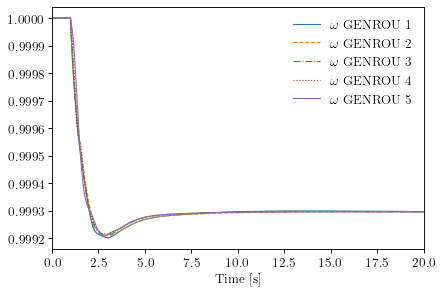

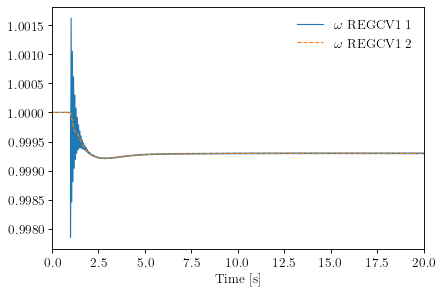

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [326]:
ssa.TDS.plt.plot(ssa.GENROU.omega)
ssa.TDS.plt.plot(ssa.REGCV1.omega)

# ssa.TDS.plt.plot(ssa.REGCV1.omega, a=0)
# ssa.TDS.plt.plot(ssa.REGCV1.omega, a=1)

hline1, hline2, vline1, and vline2 are deprecated. Use `hline` and `vline`.


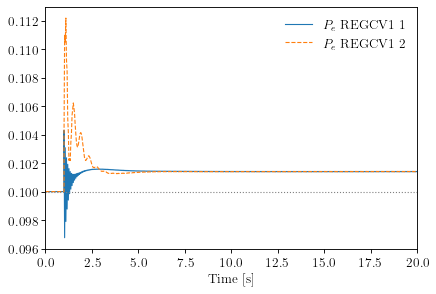

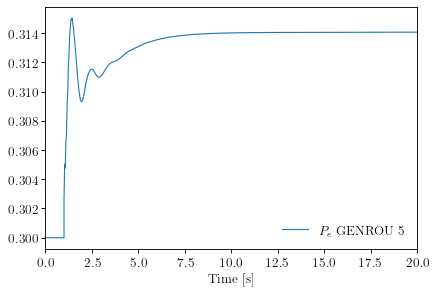

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [327]:
ssa.TDS.plt.plot(ssa.REGCV1.Pe, hline1=0.1)

ssa.TDS.plt.plot(ssa.GENROU.Pe, a=4)

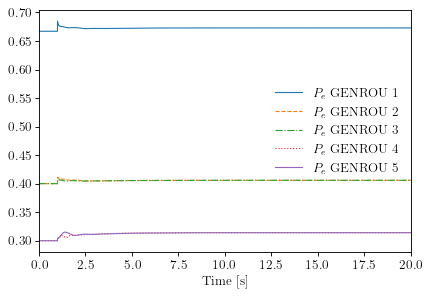

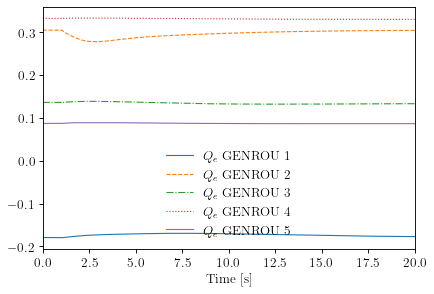

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [328]:
ssa.TDS.plt.plot(ssa.GENROU.Pe)
ssa.TDS.plt.plot(ssa.GENROU.Qe)

## Eigenvalue analysis

Singular matrix. Case is not solvable


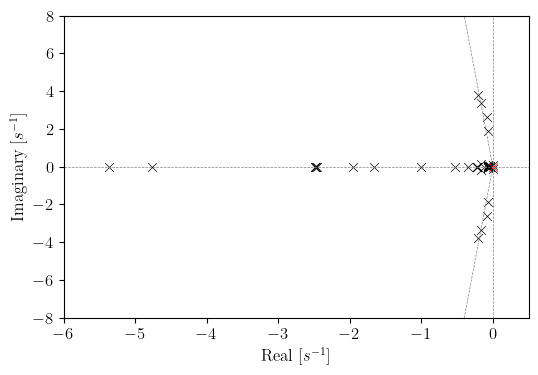

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [329]:
ssa.EIG.run()
ssa.EIG.plot()